<a href="https://colab.research.google.com/github/Bast-94/RL-DQN/blob/dqn-draft/RL_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet de Reinforcement Learning : Deep Q-Learning sur le casse-brique d'Atari

In [ ]:
! pip install -q gymnasium["atari","accept-rom-license"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 42.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.5 MB/s eta 0:00:00


## Présentation globale du projet

### Objectifs du projet

### Algorithme principal

#### Eléments clés
-
- $Q$ : Fonction de qualité qui pour un couple état-action évalue à quel point une action dans un état donné est favorable.
- $\hat{Q}$ : Target Network , il correspond à une version ancienne de $Q$ avec des paramètres $\theta^-$ sur les $C$ dernières étapes.
- $\theta$ : Correspond aux paramètre du réseau de neurones.

#### Pseudo code de l'algorithme


$\text{Algorithme de Q-Leearning profond avec répétition d'expérience}$
1. **Initialisation:**
   - Initialiser le réseau de neurones $Q$ avec des poids aléatoires
   - Initialiser la mémoire de relecture $D$ avec capacité maximale $N$
   - Initialiser les paramètres d'apprentissage
   - Initialiser la fonction $Q$ avec des $\theta$ aléatoire
   - Initialiser $\hat{Q}$ avec $\theta^⁻ = \theta$

2. **Pour chaque épisode:**
   - Initialiser l'environnement et l'état initial $s_1=\{x_1\}$
   - Appliquer le prétraitement $\phi_1 = \phi(s_1)$
   
   3. **Pour chaque étape $t$ de l'épisode:**
      - Choisir l'action $a_t$ avec la politique $\varepsilon$-greedy
        - $\mathbb{P}(a_t = argmax_a(Q(s_t,a;\theta)) = 1 - \varepsilon$
        - $\mathbb{P}(a_t = \text{random\_sample(}A)) = \varepsilon$
      - Exécuter l'action $a_t$, observer la récompense $r_t$ et l'état suivant $s_{t+1}$
      - Stocker la transition $(s_t, a_t, r_{t}, s_{t+1})$ dans la mémoire de relecture $D$
      - Affecter $s_{t+1}=s_t,a_t,x_{t+1}$
      - Prétraitement de $s_{t+1}$ : $\phi_{t+1}=\phi(s_{t+1})$
      - Échantillonner un lot aléatoire de transitions $(s_i, a_i, r_i, s_{i+1})$ de $D$
      - Calculer la vérité terrain $y_i$ pour chaque transition $(s_i, a_i, r_i, s_{i+1})$ en utilisant le réseau $\hat{Q}$ aux paramètre $\theta^-$
      - Cloner $Q$ dans $\hat{Q}$ toutes les $C$ étapes
      


## Démarche de recherche

In [ ]:
from torch import nn
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random

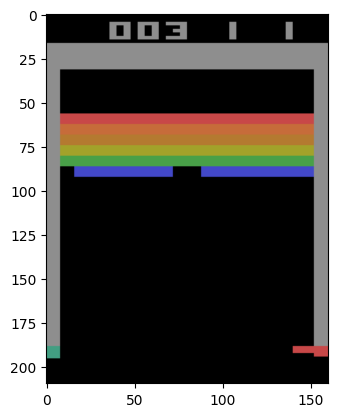

In [ ]:
env = gym.make('ALE/Breakout-v5', render_mode="rgb_array")
state = env.reset()[0]

for i in range(1000):
  action = random.randint(0,env.action_space.n-1)
  # print(action)
  state = env.step(action)[0]
plt.imshow(env.render())

### Prétraitement de images

### Elaboration d'un modèle de de DQN

### Lancement du modèle sur l'algorithme **"deep Q-learning with experience replay."** issu de l'article

In [ ]:
n_episodes = 100
for episode in range(n_episodes):
  # Pre process
  # Random sample with epsilon
